# YOLO V3 - Inspect Trained Model (COCO)

In [1]:
import colorsys
import os
import random
from timeit import default_timer as timer
import scipy.misc

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import tensorflow as tf

import libs.configs.config as config
import libs.nets.model as modellib

class_names = np.array([  'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
                       'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
                       'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
                       'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
                       'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
                       'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
                       'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                       'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
                       'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
                       'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
                       'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
                       'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
                       'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
                       'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

class CocoConfig(config.Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "voc"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes


config = CocoConfig()

# Generate colors for drawing bounding boxes.
num_class = len(class_names)
hsv_tuples = [(x / num_class, 1., 1.) for x in range(num_class)]

colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))

random.seed(10101)  # Fixed seed for consistent colors across runs.
random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
random.seed(None)  # Reset seed to default.

image = Image.open('images/test_5.jpg')
print(image.size[0],image.size[1])
image = scipy.misc.imresize(image, (config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM))
image = np.array(image) / 255.0
image = np.expand_dims(image, 0)

with open('data/yolo_anchors.txt') as f:
    anchors = f.readline()
anchors = [float(x) for x in anchors.split(',')]
anchors = np.array(anchors).reshape(-1, 2)
print(anchors.shape, anchors, config.NUM_CLASSES)

/home/tj/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(512, 640)
((9, 2), array([[ 10.,  13.],
       [ 16.,  30.],
       [ 33.,  23.],
       [ 30.,  61.],
       [ 62.,  45.],
       [ 59., 119.],
       [116.,  90.],
       [156., 198.],
       [373., 326.]]), 81)


/home/tj/anaconda2/lib/python2.7/site-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/tj/anaconda2/lib/python2.7/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


# Load Model

In [2]:
with tf.device("/CPU:0"):
        model = modellib.YOLOV3('inference', (416, 416), anchors, config, model_dir=None)

('is_training', False)
[<tf.Tensor 'Placeholder:0' shape=(?, 13, 13, 3, 86) dtype=float32>, <tf.Tensor 'Placeholder_1:0' shape=(?, 26, 26, 3, 86) dtype=float32>, <tf.Tensor 'Placeholder_2:0' shape=(?, 52, 52, 3, 86) dtype=float32>]
Tensor("MobilenetV2/Conv/Relu6:0", shape=(?, 208, 208, 32), dtype=float32, device=/device:CPU:0)
Tensor("MobilenetV2/expanded_conv/depthwise/Relu6:0", shape=(?, 208, 208, 32), dtype=float32, device=/device:CPU:0)
Tensor("MobilenetV2/expanded_conv/project/Identity:0", shape=(?, 208, 208, 16), dtype=float32, device=/device:CPU:0)
Tensor("MobilenetV2/expanded_conv_1/expand/Relu6:0", shape=(?, 208, 208, 96), dtype=float32, device=/device:CPU:0)
Tensor("MobilenetV2/expanded_conv_1/depthwise/Relu6:0", shape=(?, 104, 104, 96), dtype=float32, device=/device:CPU:0)
Tensor("MobilenetV2/expanded_conv_1/project/Identity:0", shape=(?, 104, 104, 24), dtype=float32, device=/device:CPU:0)
Tensor("MobilenetV2/expanded_conv_2/expand/Relu6:0", shape=(?, 104, 104, 144), dtype=f

# Run Detection

INFO:tensorflow:Restoring parameters from output/models/yoloV3_final.ckpt
('ckpt_path', 'output/models/yoloV3_final.ckpt')
((8, 4), (8,), (8,))
Found 8 boxes for img
('person 0.99998', (116, 208), (161, 328))
('bench 0.99324', (361, 276), (414, 311))
('bicycle 0.98411', (244, 266), (353, 326))
('person 0.96243', (234, 221), (264, 300))
('bench 0.95488', (86, 280), (256, 328))
('person 0.93804', (352, 222), (380, 271))
('person 0.75618', (93, 235), (121, 302))
('cell phone 0.74977', (257, 237), (262, 241))
processing time :  1.238925 sec


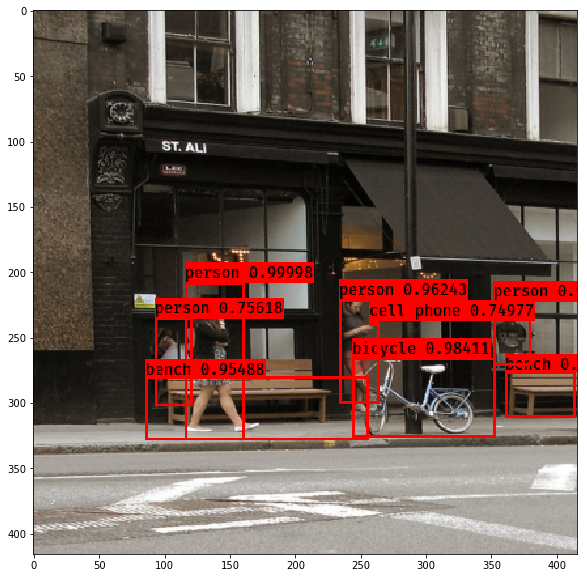

In [3]:
saver = tf.train.Saver()
init_op = tf.global_variables_initializer()

plt.figure(figsize=(10,10))

start = timer()
# Performing post-processing on CPU: loop-intensive, usually more efficient.
with tf.Session() as sess:
    sess.run(init_op)
    ckpt = tf.train.get_checkpoint_state('output/training')
    """ resotre checkpoint of Backbone network """
    if ckpt is not None:
        ckpt_path = tf.train.latest_checkpoint('output/training')
        saver.restore(sess, ckpt_path)
    else:
        ckpt_path = 'output/models/yoloV3_final.ckpt'
        saver.restore(sess, ckpt_path)
    print('ckpt_path', ckpt_path)
    #======================================================================
    out_boxes, out_scores, out_classes = sess.run([model.boxes, model.box_scores, model.box_classes],
                                                  feed_dict={ model.input_image: image })
    print(out_boxes.shape, out_scores.shape, out_classes.shape)
    print('Found {} boxes for {}'.format(len(out_boxes), 'img'))

    image = np.squeeze(image, 0)
    image = image*255.0

    image = Image.fromarray(image.astype('uint8'))
    font = ImageFont.truetype(font='font/FiraMono-Medium.otf',
                              size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
    thickness = (image.size[0] + image.size[1]) // 300

    for i in range(len(out_classes)):
        c = out_classes[i]
        predicted_class = class_names[c]
        box = out_boxes[i]
        score = out_scores[i]

        label = '{} {:.5f}'.format(predicted_class, score)
        draw = ImageDraw.Draw(image)
        label_size = draw.textsize(label, font)

        top, left, bottom, right = box
        top = max(0, np.floor(top + 0.5).astype('int32'))
        left = max(0, np.floor(left + 0.5).astype('int32'))
        bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
        right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
        print(label, (left, top), (right, bottom))

        if top - label_size[1] >= 0:
            text_origin = np.array([left, top - label_size[1]])
        else:
            text_origin = np.array([left, top + 1])

        # My kingdom for a good redistributable image drawing library.
        for i in range(thickness):
            draw.rectangle(
                [left + i, top + i, right - i, bottom - i],
                outline=colors[c])
        draw.rectangle(
            [tuple(text_origin), tuple(text_origin + label_size)],
            fill=colors[c])
        draw.text(text_origin, label, fill=(0, 0, 0), font=font)
        del draw

    end = timer()
    print("processing time :  %f sec"%(end - start))
    plt.imshow(image);
    plt.show()
    sess.close()